<a href="https://www.kaggle.com/code/yaesnurma/covid19-analysis?scriptVersionId=177946514" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option("display.width", 500)
pd.set_option("display.max_columns", None)
df = pd.read_csv(r'/kaggle/input/covid-analysis/Covid19-Turkey.csv')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-analysis/Covid19-Turkey.csv


In [2]:
df["Date"] = pd.to_datetime(df["Date"])

recovered = [r for r in df["Total Recovered"]]
drecovered = []
for index, value in enumerate(recovered):
    if recovered[index] == recovered[index - 1]:
        drecovered.append(0)
    else:
        drecovered.append(value - recovered[index - 1])
drecovered[0] = 0
df["Daily Recovered"] = drecovered

died = [int(r) for r in df["Total Deaths"]]
death = []
for index, value in enumerate(died):
    if died[index] == died[index - 1]:
        death.append(0)
    else:
        death.append(died[index] - died[index - 1])
death[0] = 0
df["Daily Death"] = death

intubated = [r for r in df["Intubated Cases"]]
dintubated = []
for index, value in enumerate(intubated):
    if intubated[index] == intubated[index - 1]:
        dintubated.append(0)
    else:
        if value - intubated[index - 1] < 0:
            dintubated.append(0)
        else:
            dintubated.append(value - intubated[index - 1])
for index, value in enumerate(dintubated):
    if str(value) == 'nan':
        dintubated[index] = 0.0
df["Daily Intubated"] = dintubated


In [3]:
def infoDataframe(DataFrame):
    print("date of last update of information : ", DataFrame["Date"].max())
    print("total case : ", DataFrame["Total Cases"].max())
    print("total death : ", DataFrame["Total Deaths"].max())
    print("total recovered : ", DataFrame["Total Recovered"].max())
    print("average case increase :  ", DataFrame["Daily(Cases/Test) %"].max())
    print("average death increase :  ", (DataFrame["Total Deaths"] / DataFrame["Total Cases"]).max())
    #print("average intubated patient :  ", (DataFrame["Daily Intubated"] / DataFrame["Daily Cases"]).max())
    print("average recovered patient :  ", (DataFrame["Daily Recovered"] / DataFrame["Daily Cases"]).max())



In [4]:
def DataframeGraphics(dataframe):
 
    plt.title("Daily Information")
    plt.plot(dataframe["Date"], dataframe["Daily Cases"], lw=2, label="Daily Cases")
    plt.plot(dataframe["Date"], dataframe["Daily Death"], lw=2, label="Daily Death")
    plt.plot(dataframe["Date"], dataframe["Daily Recovered"], lw=2, label="Daily Recovered")
    plt.legend()
    plt.xlabel("Date")
    plt.show()
    plt.title("Important Ratios")
    plt.plot(dataframe["Date"], dataframe["Total Deaths"], lw=2, label="Total deaths")
    plt.plot(dataframe["Date"], dataframe["Total Cases"], lw=2, label="Total cases")
    plt.plot(dataframe["Date"], dataframe["Total Recovered"], lw=2, label="Total recovered")
    plt.plot(dataframe["Date"], dataframe["Active Cases"], lw=2, label="Active Cases")
    plt.xlabel("Date")
    plt.legend()
    plt.show()
    plt.title("Ratio")
    plt.plot(dataframe["Date"], dataframe["(Death / Active Cases) %"], lw=2, label="Death/Active Cases")
    plt.plot(dataframe["Date"], dataframe["(Recovered / Active Cases) %"], lw=2, label="Active Cases/Population")
    plt.xlabel("Date")
    plt.legend()
    plt.show()


date of last update of information :  2020-08-04 00:00:00
total case :  235408
total death :  5765
total recovered :  218491
average case increase :   27.47
average death increase :   0.027704353063204738
average recovered patient :   3.448938321536906


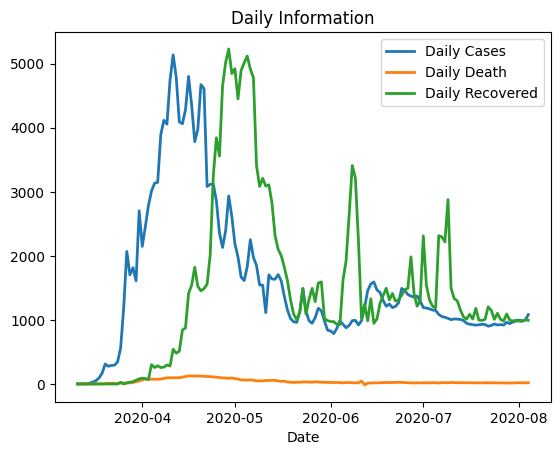

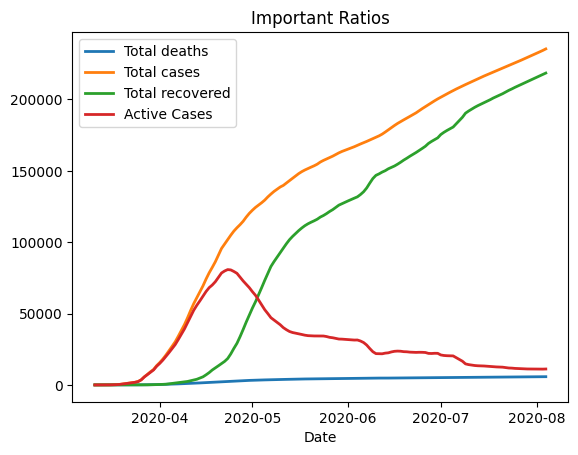

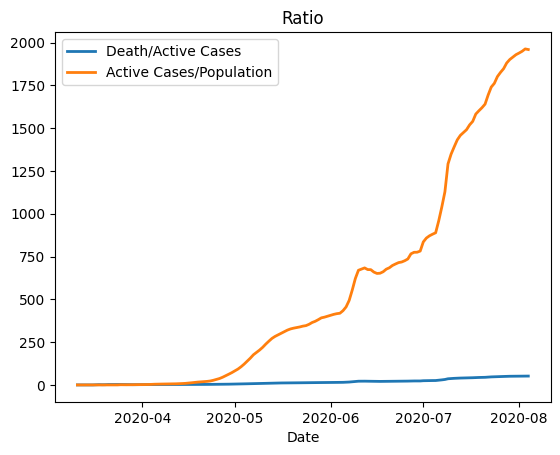

In [5]:
infoDataframe(df)
DataframeGraphics(df)
